# Ejemplo de ajuste no-polinómico

In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import *
from numpy import *

Cargamos los datos desde el archivo `ej-ajuste-03.txt` (ver blog del curso):

In [3]:
d = genfromtxt('ej-ajuste-03.txt')
x = d[:,0]
y = d[:,1]
print(x)
print(y)

[ 0.1   0.25  0.41  0.56  0.71  0.86  1.02  1.17  1.32  1.47  1.63  1.78
  1.93  2.08  2.24  2.39  2.54  2.69  2.85  3.  ]
[ 0.738  0.826  0.981  0.974  0.915  0.897  0.739  0.785  0.635  0.52   0.49
  0.428  0.497  0.355  0.359  0.328  0.44   0.441  0.433  0.419]


Y graficamos los puntos:

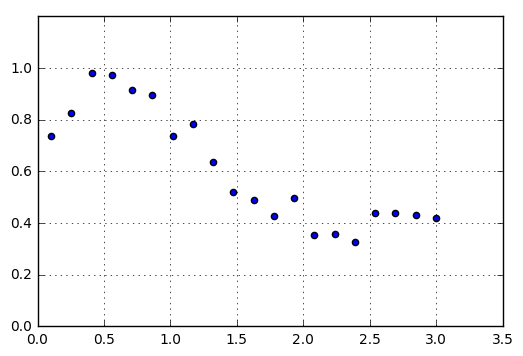

In [4]:
scatter(x,y)
xlim(0,3.5)
ylim(0,1.2)
grid()

En este caso, ajustaremos la siguiente función (modelo) a los datos:
$$
f(x)=a+e^{-bx}\sin(cx),
$$
donde $a,b$ y $c$ son los parámetros a ajustar usando el método de mínimos cuadrados.

Ingresamos primero la función que ajustaremos:

In [5]:
def f(x,a,b,c):
    return a+exp(-b*x)*sin(c*x)

Antes de realizar el ajute, podemos explorar "a mano" cómo cambia la función al variar los parámetros $(a,b,c)$, por ejemplo, usando la función `interact` de `IPython.html.widgets` (requiere una versión reciente de Ipython!):

In [6]:
from ipywidgets import interact
xx=linspace(0,3.5,100)
def p(a=1,b=1,c=1):
    scatter(x,y)
    plot(xx,f(xx,a,b,c), color='red')
    xlim(0,3.5)
    ylim(0,1.2)
    grid()
    chi2 = sum((y-f(x,a,b,c))**2)
    print(chi2)

6.73727042943


<function __main__.p>

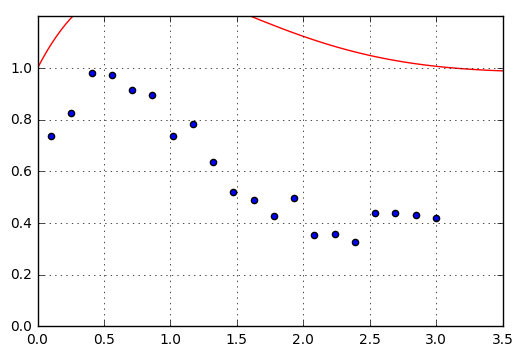

In [7]:
interact(p,a=(0,5,0.1),b=(0,5,0.1),c=(0,5,0.1))

Ahora realizaremos el ajuste, usando la función `curve_fit` del paquete `scipy.optimize`. La sintaxis es simple:

In [8]:
from scipy.optimize import curve_fit

(a,b,c),_=curve_fit(f,x,y)

print('a= '+str(a))
print('b= '+str(b))
print('c= '+str(c))

a= 0.480915952108
b= 1.02623345485
c= 1.91603506169


Podemos ver cómo luce la curva obtenida con estos valores "óptimos" de los parámetros:

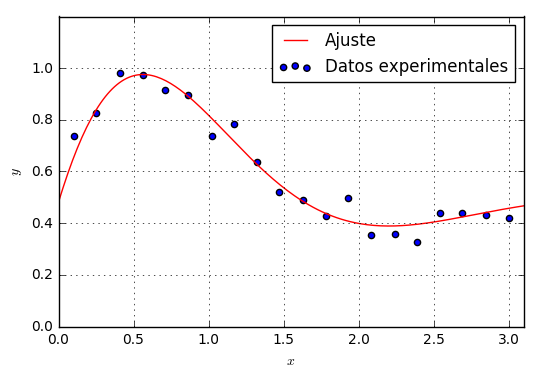

In [9]:
xx=linspace(0,3.1,200)
scatter(x,y, label='Datos experimentales')
plot(xx,f(xx,a,b,c),label='Ajuste',color='red')
xlabel("$x$")
ylabel("$y$")
xlim(0,3.1)
ylim(0,1.2)
legend()
grid()

El valor de $\chi^2$ para este ajuste es:

In [10]:
chi2 = sum((y-f(x,a,b,c))**2)
print(chi2)

0.0381927517371


Alternativamente, puede usarse la fución `leastsq` de  `scipy.optimize`, que es más poderosa y flexible, pero tiene una sintexis algo menos amigable:

In [11]:
from scipy.optimize import leastsq

def ep(a,x,y):
    return a[0]+exp(-a[1]*x)*sin(a[2]*x)-y
    
a_in=[1,1,1]
(a2,b2,c2),_= leastsq(ep,a_in,args=(x,y))
print(a2,b2,c2)

(0.48091595210776134, 1.02623345485013, 1.9160350616923749)
